task 1: check ENCODE DNase I Accessibility of SNPs of interest in 95 cell types

rs1652376	rs1788783	rs891387	rs1788817	rs1367083	rs1788808	rs4800490

In [1]:
!pwd

/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase


In [2]:
import os
import pyBigWig
import pandas as pd


# Directory containing BigWig files
directory = '/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase'

SNP_list = ['rs1652376', 'rs1788783', 'rs891387','rs1788817','rs1367083','rs1788808','rs4800490','rs2960578']
# Genomic positions (chromosome, start, end)
positions = [('chr18', 23529501, 23529502), ('chr18', 23581169, 23581170),('chr18', 23523944, 23523945),('chr18', 23517495, 23517496),
             ('chr18', 23520275, 23520276),('chr18', 23510058, 23510059),('chr18', 23546116, 23546117),('chr18', 23563775, 23563776)]

# Initialize a list to hold the data
data = []

# Iterate over BigWig files
for filename in os.listdir(directory):
    if filename.endswith('.bw'):
        print(os.path.join(directory, filename))
        bw = pyBigWig.open(os.path.join(directory, filename))
        row = [bw.stats(pos[0], pos[1], pos[2], type='mean')[0] for pos in positions]
        row.insert(0, filename)
        data.append(row)
        bw.close()




/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwK562Signal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwHmvecdneoSignal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwNhdfneoSignal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwHrgecSignal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwTh2Signal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwGm12865Signal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwHmvecdblneoSignal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwNhberaSignal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeRegDnaseUwWerirb1Signal.bw
/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/wgEncodeR

In [3]:
data

[['wgEncodeRegDnaseUwK562Signal.bw',
  6.703199863433838,
  8.765729904174805,
  0.5156310200691223,
  0.5156310200691223,
  0.5156310200691223,
  0.0,
  None,
  1.5468900203704834],
 ['wgEncodeRegDnaseUwHmvecdneoSignal.bw',
  0.2624329924583435,
  0.524865984916687,
  0.7872989773750305,
  0.7872989773750305,
  3.674060106277466,
  0.7872989773750305,
  None,
  1.5745999813079834],
 ['wgEncodeRegDnaseUwNhdfneoSignal.bw',
  2.1590099334716797,
  14.033599853515625,
  1.3493800163269043,
  0.26987600326538086,
  0.0,
  0.26987600326538086,
  None,
  5.937270164489746],
 ['wgEncodeRegDnaseUwHrgecSignal.bw',
  0.8375399708747864,
  3.3501598834991455,
  5.8627800941467285,
  0.4187699854373932,
  1.256309986114502,
  0.4187699854373932,
  None,
  4.606470108032227],
 ['wgEncodeRegDnaseUwTh2Signal.bw',
  1.5596699714660645,
  1.3647099733352661,
  1.7546299695968628,
  0.7798359990119934,
  0.9747949838638306,
  0.5848770141601562,
  None,
  4.289100170135498],
 ['wgEncodeRegDnaseUwGm12865

In [4]:
# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=['filename','rs1652376', 'rs1788783', 'rs891387','rs1788817','rs1367083','rs1788808','rs4800490','rs2960578'])

# Save DataFrame to CSV
df.to_csv('bigwig_data.csv', index=False)

task 2: plot the data according to (1)Tissues (2)Cell types

In [31]:
import pandas as pd
data = pd.read_excel('/Users/guoqingfeng/Downloads/project/GWAS/GWAS_DATA/ENCODE_95_DNase/encode_95_rs_value.xlsx',sheet_name='Sheet2',header= 0)

In [32]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to take the log of
data['rs1652376_log'] = np.log2(data['rs1652376'] + 1) - 1.59
data['rs1788783_log'] = np.log2(data['rs1788783'] + 1) - 1.59
data['rs891387_log'] = np.log2(data['rs891387'] + 1) - 1.59
data['rs1788817_log'] = np.log2(data['rs1788817'] + 1) - 1.59
data['rs1367083_log'] = np.log2(data['rs1367083'] + 1) - 1.59
data['rs1788808_log'] = np.log2(data['rs1788808'] + 1) - 1.59
data['rs2960578_log'] = np.log2(data['rs2960578'] + 1) - 1.59


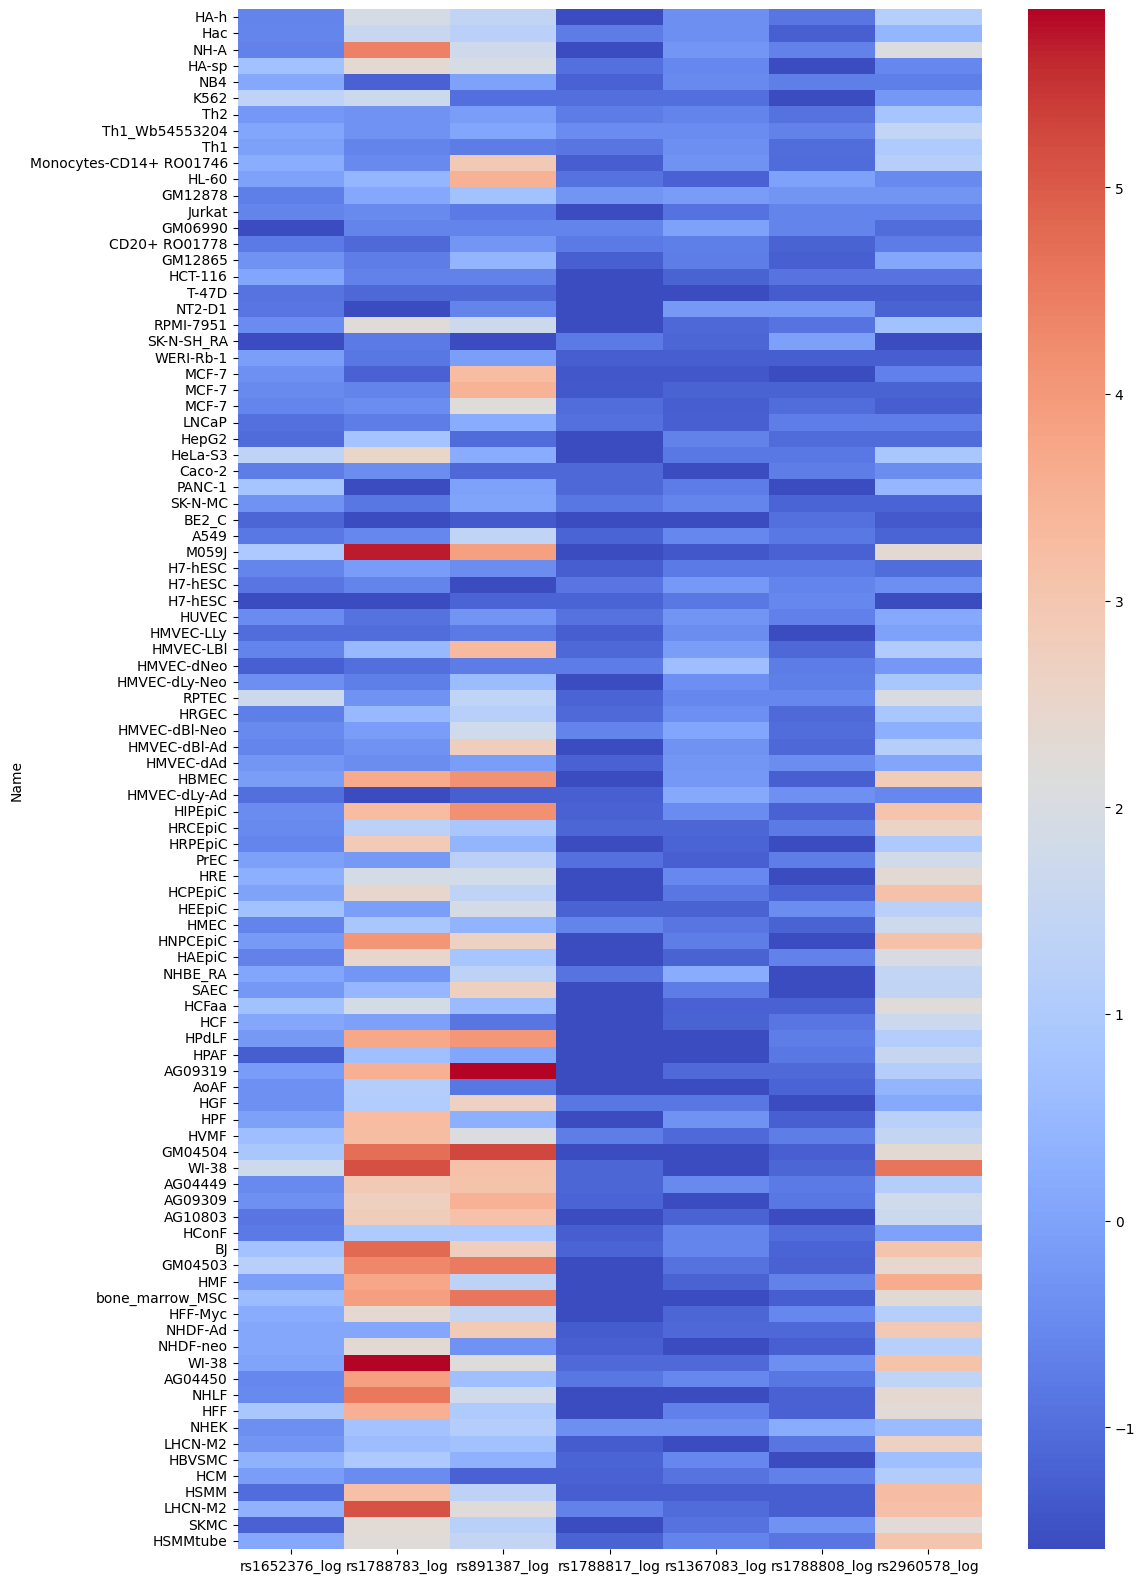

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_data = data.sort_values(by='Cell_type')
# Assuming 'data' is your DataFrame and it includes the 'Name' and 'rs*' columns
# Set 'Name' as the index if it isn't already
heatmap_data = sorted_data.set_index('Name')

# Select only the columns for the heatmap
heatmap_data = heatmap_data[['rs1652376_log', 'rs1788783_log', 'rs891387_log', 'rs1788817_log', 'rs1367083_log', 'rs1788808_log','rs2960578_log']]

# Create the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data, cmap='coolwarm')  # You can choose any other colormap like 'coolwarm', 'plasma', etc.
plt.show()


# rs1788783_log

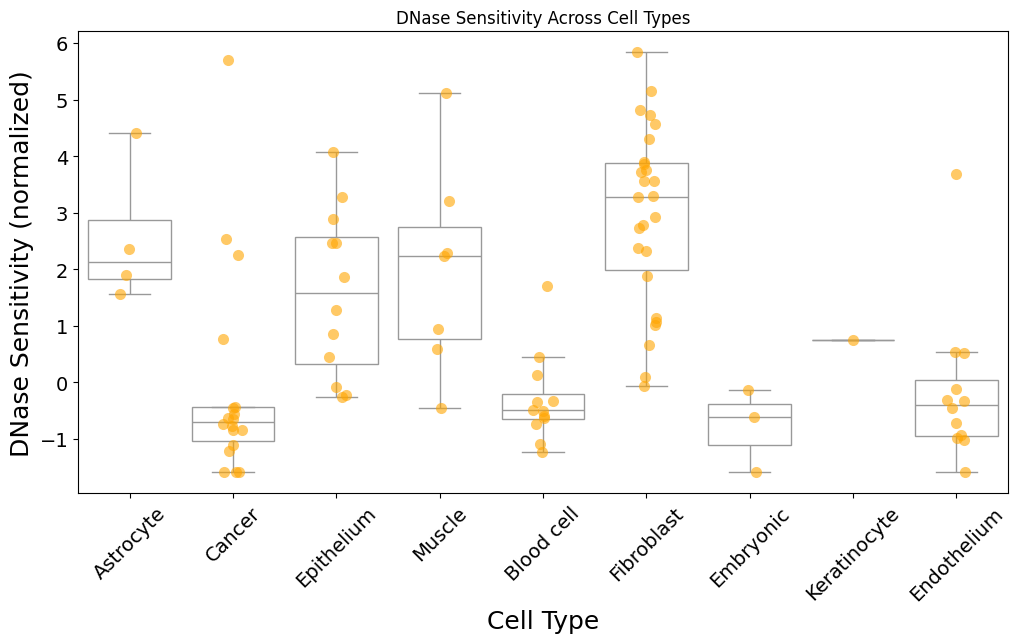

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
#sns.violinplot(x='Cell_type', y='rs1788783_log', data=data, inner=None, color=".8")
sns.boxplot(x='Cell_type', y='rs1788783_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Cell_type', y='rs1788783_log', data=data, jitter=True, alpha=0.6,size=8, color='orange')

# Customize the plot
plt.title('DNase Sensitivity Across Cell Types')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Cell Type',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)


# Save the plot as an SVG file
plt.savefig('violin_plot_rs1788783_celltype.svg', format='svg')

plt.show()

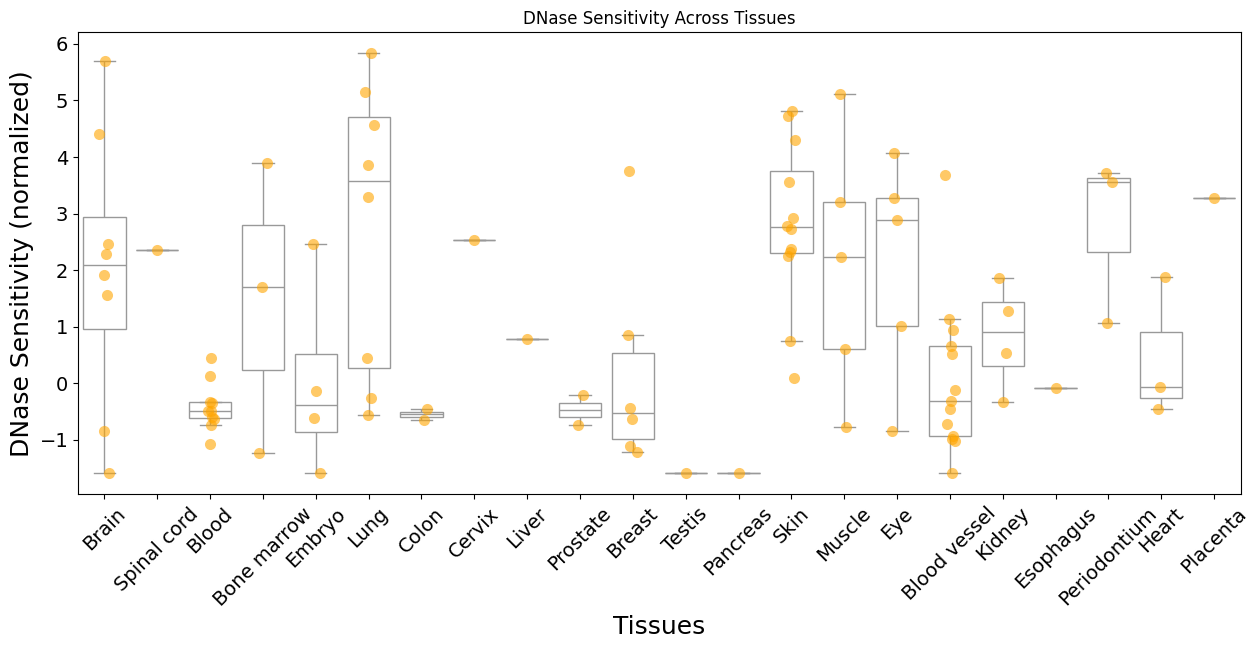

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 6))
#sns.violinplot(x='Cell_type', y='rs891387_log', data=data, inner= None, color='.8')
sns.boxplot(x='Tissue', y='rs1788783_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Tissue', y='rs1788783_log', data=data, jitter=True, alpha=0.6,size=8, color='orange')

# Customize the plot
plt.title('DNase Sensitivity Across Tissues')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Tissues',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)

# Save the plot as an SVG file
plt.savefig('violin_plot_rs1788783_Tissue.svg', format='svg')

plt.show()

# rs891387_log

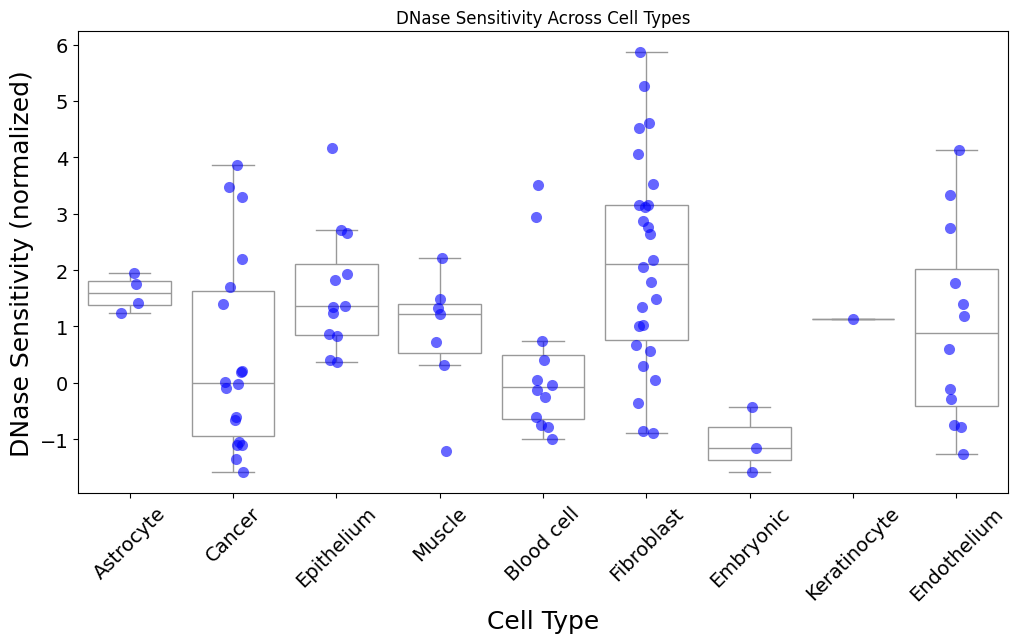

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
#sns.violinplot(x='Cell_type', y='rs1788783_log', data=data, inner=None, color=".8")
sns.boxplot(x='Cell_type', y='rs891387_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Cell_type', y='rs891387_log', data=data, jitter=True, alpha=0.6,size=8, color='blue')

# Customize the plot
plt.title('DNase Sensitivity Across Cell Types')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Cell Type',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)


# Save the plot as an SVG file
plt.savefig('violin_plot_rs891387_celltype.svg', format='svg')

plt.show()

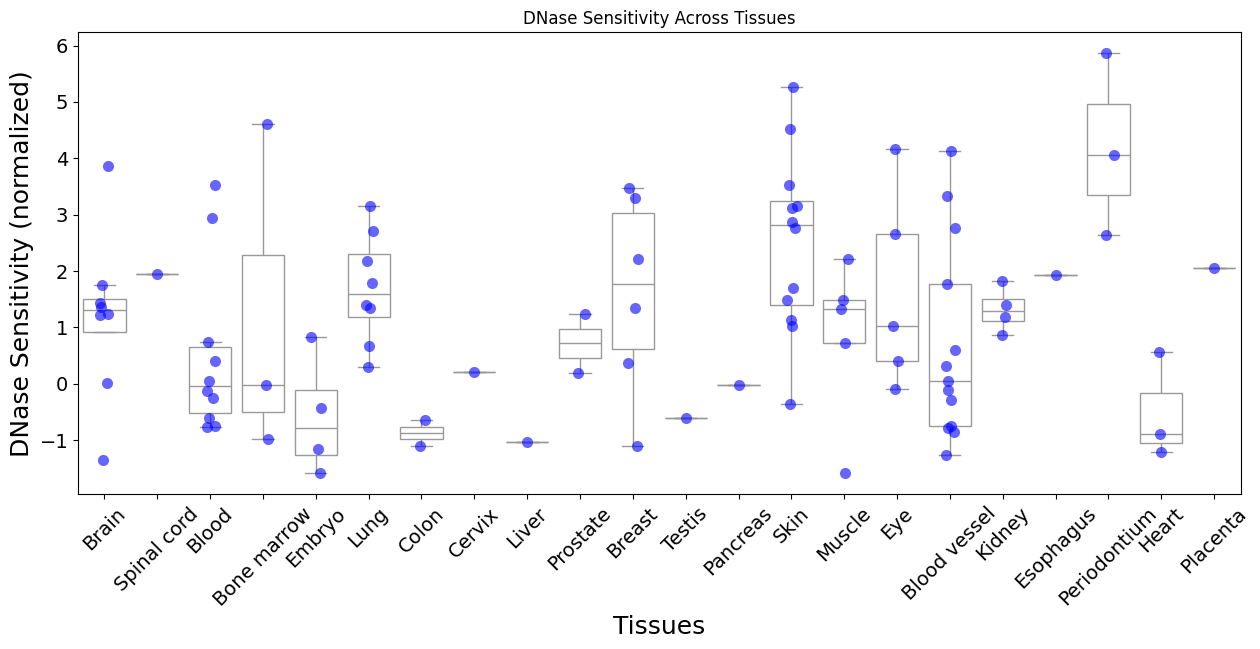

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 6))
#sns.violinplot(x='Cell_type', y='rs891387_log', data=data, inner= None, color='.8')
sns.boxplot(x='Tissue', y='rs891387_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Tissue', y='rs891387_log', data=data, jitter=True, alpha=0.6,size=8, color='blue')

# Customize the plot
plt.title('DNase Sensitivity Across Tissues')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Tissues',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)

# Save the plot as an SVG file
plt.savefig('violin_plot_rs891387_Tissue.svg', format='svg')

plt.show()

# rs1652376_log

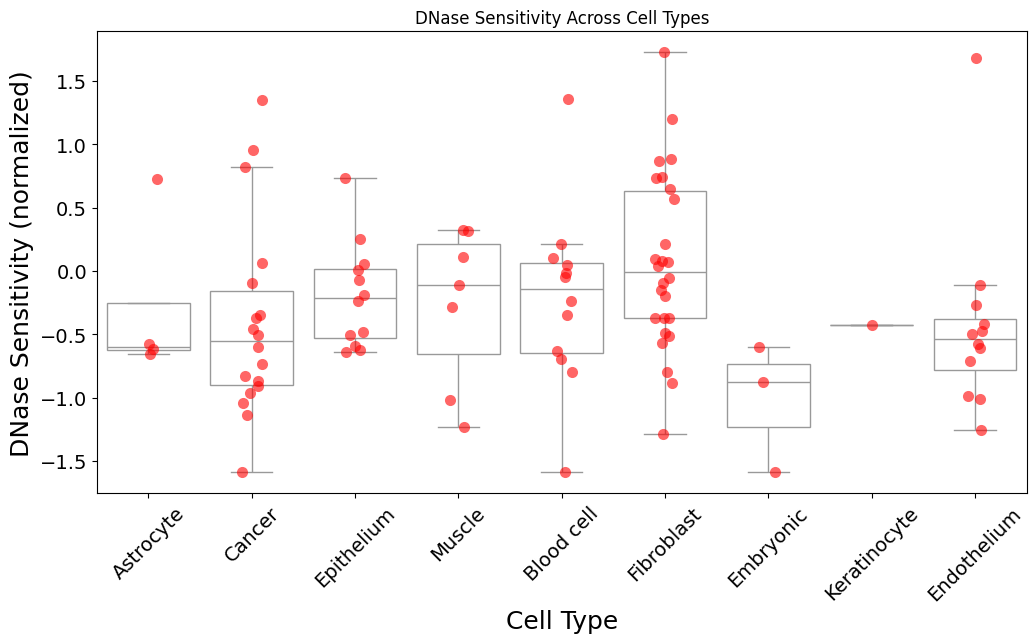

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
#sns.violinplot(x='Cell_type', y='rs1788783_log', data=data, inner=None, color=".8")
sns.boxplot(x='Cell_type', y='rs1652376_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Cell_type', y='rs1652376_log', data=data, jitter=True, alpha=0.6,size=8, color='red')

# Customize the plot
plt.title('DNase Sensitivity Across Cell Types')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Cell Type',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)


# Save the plot as an SVG file
plt.savefig('violin_plot_rs1652376_celltype.svg', format='svg')

plt.show()

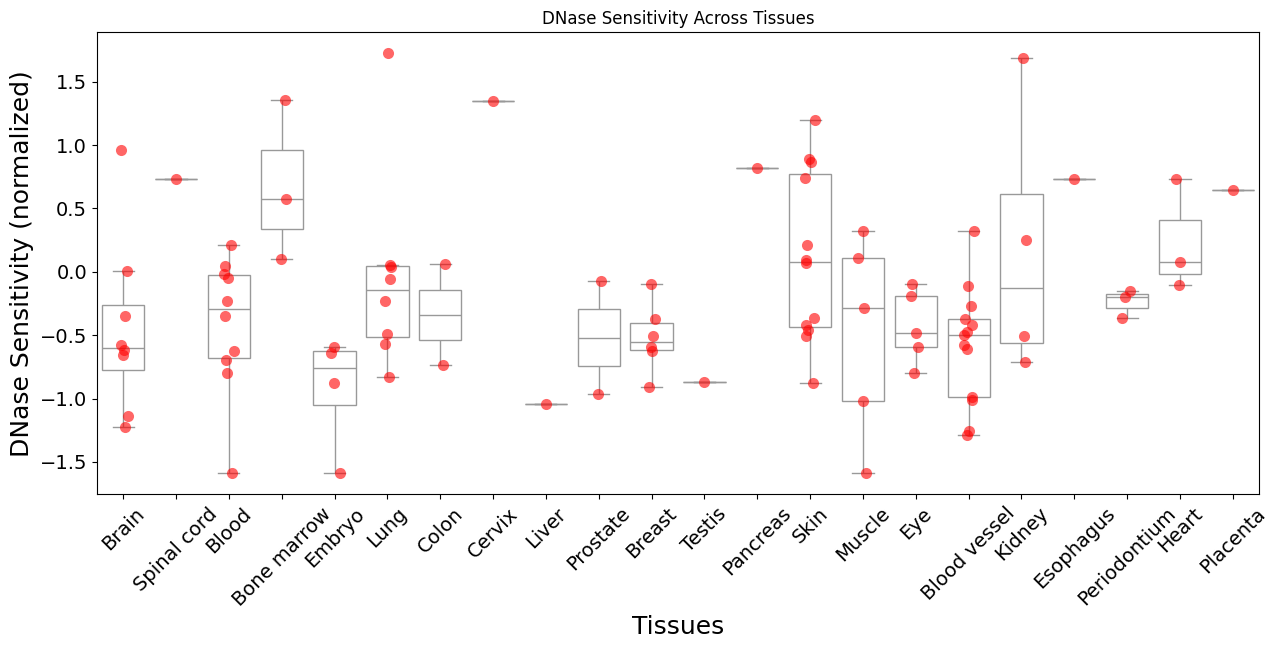

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 6))
#sns.violinplot(x='Cell_type', y='rs891387_log', data=data, inner= None, color='.8')
sns.boxplot(x='Tissue', y='rs1652376_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Tissue', y='rs1652376_log', data=data, jitter=True, alpha=0.6,size=8, color='red')

# Customize the plot
plt.title('DNase Sensitivity Across Tissues')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Tissues',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)

# Save the plot as an SVG file
plt.savefig('violin_plot_rs1652376_Tissue.svg', format='svg')

plt.show()

# rs2960578_log

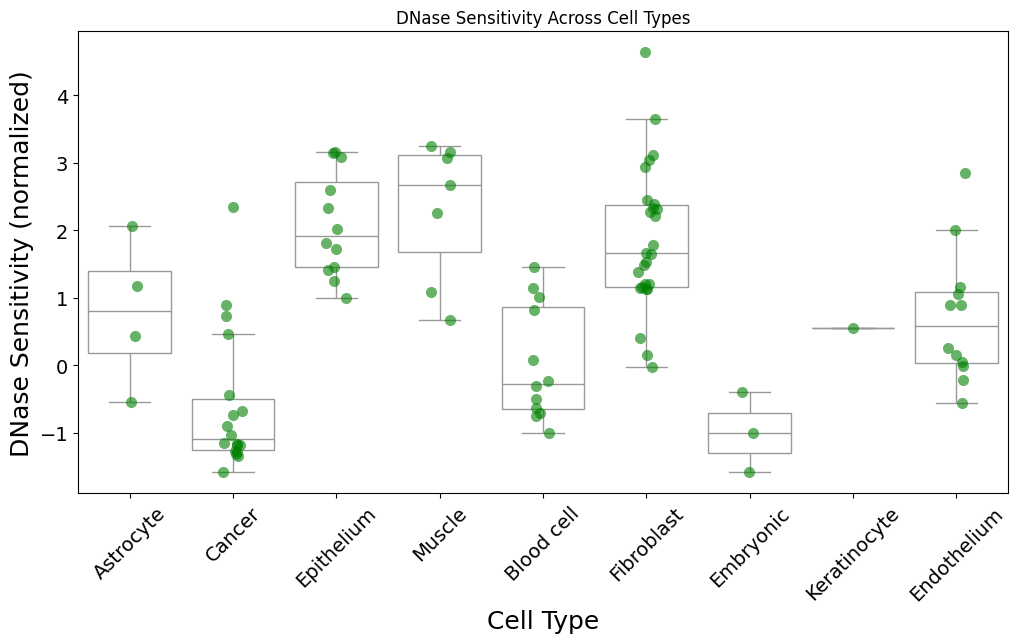

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
#sns.violinplot(x='Cell_type', y='rs1788783_log', data=data, inner=None, color=".8")
sns.boxplot(x='Cell_type', y='rs2960578_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Cell_type', y='rs2960578_log', data=data, jitter=True, alpha=0.6,size=8, color='green')

# Customize the plot
plt.title('DNase Sensitivity Across Cell Types')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Cell Type',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)


# Save the plot as an SVG file
plt.savefig('violin_plot_rs2960578_celltype.svg', format='svg')

plt.show()

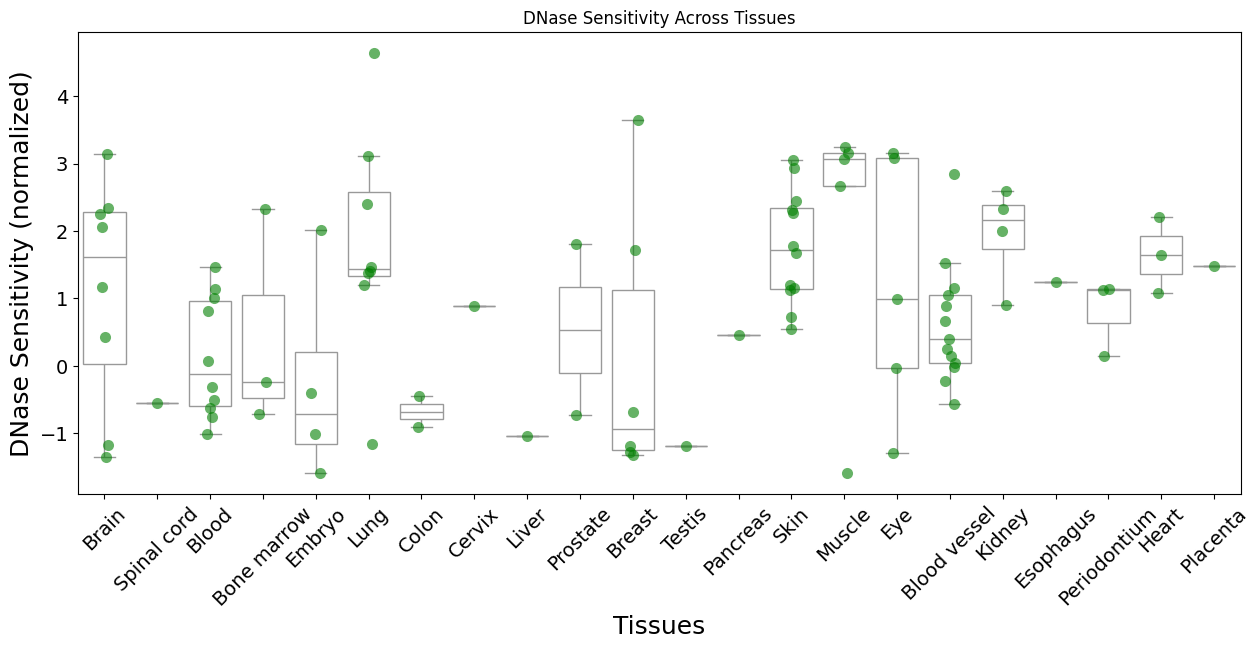

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(15, 6))
#sns.violinplot(x='Cell_type', y='rs891387_log', data=data, inner= None, color='.8')
sns.boxplot(x='Tissue', y='rs2960578_log', data=data, color='white',showfliers=False)
sns.stripplot(x='Tissue', y='rs2960578_log', data=data, jitter=True, alpha=0.6,size=8, color='green')

# Customize the plot
plt.title('DNase Sensitivity Across Tissues')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('Tissues',size=18)
plt.ylabel('DNase Sensitivity (normalized)',size=18)

# Save the plot as an SVG file
plt.savefig('violin_plot_rs2960578_Tissue.svg', format='svg')

plt.show()